# BreizhCrops

explores the raw time series data. 
for model training with the 13 most common crops see `TrainEvaluateModels.ipynb` 

In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
codes = pd.read_csv("codes.csv", delimiter=";",encoding="utf-8")

regions = dict(
    frh01=gpd.read_file("/data/france/BreizhCrops/shp/raw/FRH01.shp"),
    frh02=gpd.read_file("/data/france/BreizhCrops/shp/raw/FRH02.shp"),
    frh03=gpd.read_file("/data/france/BreizhCrops/shp/raw/FRH03.shp"),
    frh04=gpd.read_file("/data/france/BreizhCrops/shp/raw/FRH04.shp")
)

annotated_shape_file_folder = "/data/france/BreizhCrops/shp/annotated"

In [3]:

english_group_names = ['common wheat','corn grain and silage','barley','other cereals',
       "rapeseed", "sunflower", "other oilseeds", "protein crops",
       'fibre plants','gel (frozen surfaces without production)','rice',
       'pulses','fodder','estives and heaths',
       "permanent meadows", "temporary meadows", "orchards",
       "vines", "nuts", "olive trees",
       'other industrial crops','vegetables or flowers',
       "sugar cane", "miscellaneous"]

french_group_names = ['Blé tendre', 'Maïs grain et ensilage', 'Orge', 'Autres céréales',
       'Colza', 'Tournesol', 'Autres oléagineux', 'Protéagineux',
       'Plantes à fibres', 'Gel (surfaces gelées sans production)', 'Riz',
       'Légumineuses à grains', 'Fourrage', 'Estives et landes',
       'Prairies permanentes', 'Prairies temporaires', 'Vergers',
       'Vignes', 'Fruits à coque', 'Oliviers',
       'Autres cultures industrielles', 'Légumes ou fleurs',
       'Canne à sucre', 'Divers']

mapping = pd.DataFrame([english_group_names,french_group_names],index=["group_name","french_group_names"]).T

codes = pd.merge(codes,mapping,left_on = "Libellé Groupe Culture",right_on = "french_group_names")

In [4]:
codes

,Code Culture,Libellé Culture,Code Groupe Culture,Libellé Groupe Culture,group_name,french_group_names
0,BTH,Blé tendre d'hiver,1,Blé tendre,common wheat,Blé tendre
1,BTP,Blé tendre de printemps,1,Blé tendre,common wheat,Blé tendre
2,MID,Maïs doux,2,Maïs grain et ensilage,corn grain and silage,Maïs grain et ensilage
3,MIE,Maïs ensilage,2,Maïs grain et ensilage,corn grain and silage,Maïs grain et ensilage
4,MIS,Maïs,2,Maïs grain et ensilage,corn grain and silage,Maïs grain et ensilage
5,ORH,Orge d'hiver,3,Orge,barley,Orge
6,ORP,Orge de printemps,3,Orge,barley,Orge
7,AVH,Avoine d'hiver,4,Autres céréales,other cereals,Autres céréales
8,AVP,Avoine de printemps,4,Autres céréales,other cereals,Autres céréales
9,BDH,Blé dur d'hiver,4,Autres céréales,other cereals,Autres céréales


add groups and group names to the shapefiles

In [5]:
for name, data in regions.items():
    regions[name] = pd.merge(data,codes,left_on = "CODE_CULTU",right_on = "Code Culture")

store annotated shapefiles

In [6]:
for name, data in regions.items():
    path = annotated_shape_file_folder + "/" + name + ".shp"
    print("saving "+path)
    regions[name].to_file(path, driver='ESRI Shapefile', encoding="utf-8")

saving /data/france/BreizhCrops/shp/annotated/frh01.shp
saving /data/france/BreizhCrops/shp/annotated/frh02.shp
saving /data/france/BreizhCrops/shp/annotated/frh03.shp
saving /data/france/BreizhCrops/shp/annotated/frh04.shp


count number of instances per group

In [7]:
counts = list()
for name, data in regions.items():
    count = data.groupby("group_name").count()["ID"]
    count.name=name
    counts.append(count)
counts = gpd.GeoDataFrame(counts).fillna(0).astype(int).T

### Select the most common crops for model training
take only crop types that appear at least 200 times in each region and 1000 times in all regions

In [8]:
minimum_instances_per_region = 250
minimum_instances_total = 1000

counts = counts.loc[(counts >= minimum_instances_per_region).all(1) & (counts.sum(1) >= minimum_instances_total)]

In [9]:
counts

,frh01,frh02,frh03,frh04
barley,13051,10740,7154,5981
common wheat,30383,15028,27206,17012
corn grain and silage,44008,36622,42015,31369
fodder,6519,4337,7641,4542
gel (frozen surfaces without production),1522,3270,2815,4560
miscellaneous,17672,12158,21217,15594
orchards,947,350,1224,556
other cereals,6280,3663,4518,5791
permanent meadows,32664,36568,32564,26154
protein crops,1107,463,1079,658


## Explore the Data

### Class frequency on the four Regions

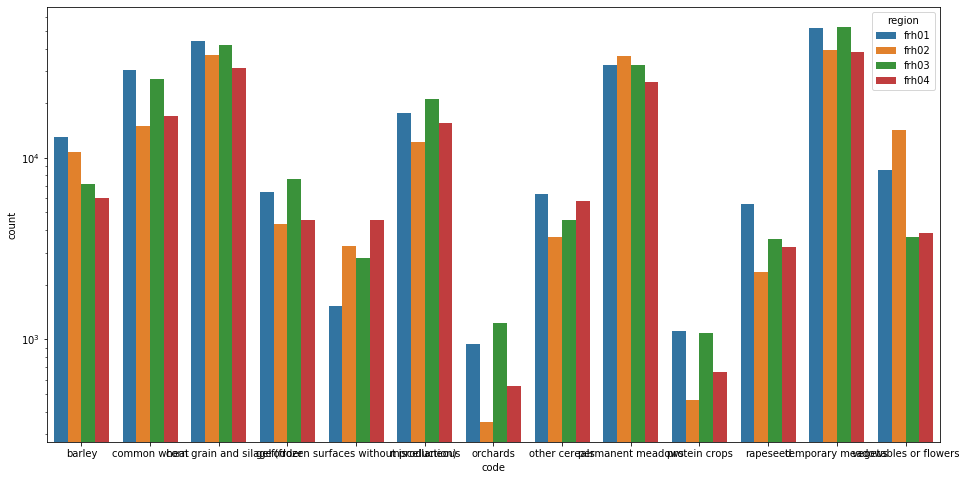

In [10]:
fig,ax = plt.subplots(1,1,figsize=(16,8))

data_=counts.stack().reset_index()
data_.columns=["code","region","count"]
ax = sns.barplot(x="code", y="count", hue="region", data=data_,ax=ax)
ax.set_yscale('log')

### Histogram over sequence lengths T of each parcel

In [11]:
files = os.listdir("data/csv/frh01")
Ts = list()
for f in files[:1000]:
    Ts.append(len(pd.read_csv(os.path.join("data/csv/frh01",f)).groupby("doa").first()))
Ts = np.array(Ts)

In [12]:
counts, b = np.histogram(Ts, bins=Ts.max(), range=(0,Ts.max()), density=True)

Text(0.5, 0, 'number of observations per parcel')

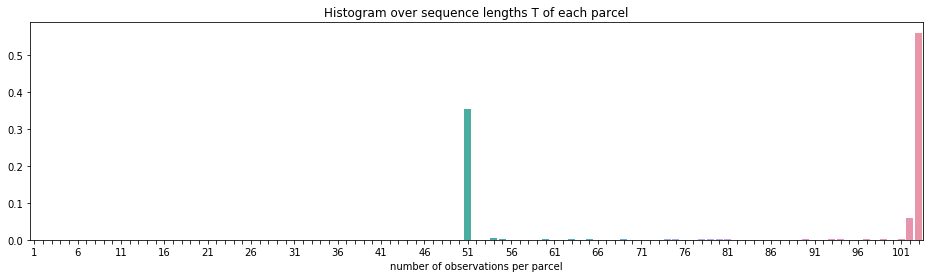

In [13]:
fig, ax = plt.subplots(figsize=(16,4))
sns.barplot(y=counts, x=np.arange(1,len(counts)+1), ax=ax)

i=0
for label in ax.get_xticklabels():
    if i%5==0:
        label.set_visible(True)
    else:
        label.set_visible(False)
    i+=1
ax.set_title("Histogram over sequence lengths T of each parcel")
ax.set_xlabel("number of observations per parcel")

### Histogram over time differences between acquisitions

Text(0.5, 0, 'Number of days in between acquisitions')

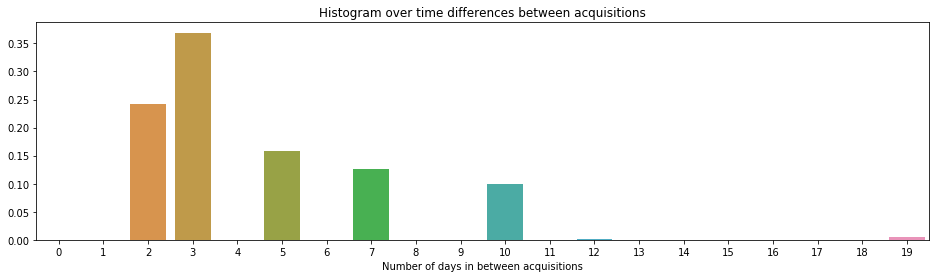

In [14]:
def load(example):
    data = pd.read_csv(example).groupby("doa").first()
    data["doa"] = pd.to_datetime(data.index)
    return data["doa"].diff().dt.days.dropna().values

delta_day = [load(os.path.join("data/csv/frh01/",f)) for f in files[:500]]
delta_day = np.hstack(delta_day)
             
counts,_ = np.histogram(delta_day, bins=int(delta_day.max()), range=(0,int(delta_day.max())), density=True)

fig, ax = plt.subplots(figsize=(16,4))
sns.barplot(y=counts, x=np.arange(len(counts)), ax=ax)
ax.set_title("Histogram over time differences between acquisitions")
ax.set_xlabel("Number of days in between acquisitions")